# STC Energy-Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""DYNAP-SE energy consumption parameters
"""
static_power = 230e-6   # W (Bauer, 2020)

gen_spike    = 883e-12  # for every spike-event
enc_spike    = 883e-12  # for every spike-event
rout_incore  = 6.84e-9  # for every received spike (not for off-chip monitoring)
rout_outcore = 360e-12  # for every intercore spike
cam_pulse    = 324e-12  # for every receiving synapse

"""Receptive-field detector parameters
"""
n_cams    = 9
spikes_in  = 5
spikes_out = 1
n_delays  = 4

In [3]:
"""Energy calculations
"""
# Synaptic RF energy calculation
e_syn_old = (
    #spikes_in * (enc_spike + rout_outcore)     # Source spikes
    + (2*n_delays) * cam_pulse                 # RF CAM pulses
    #+ spikes_out * (enc_spike + rout_outcore)  # RF output spikes
)  

# STC (Sheik) energy calculation
e_stc_old = (
    #(spikes_in) * (enc_spike + rout_outcore + ext_pulse)  # Source spikes
    + n_delays * (enc_spike + rout_outcore + cam_pulse + gen_spike)   # Delay spikes
    #+ spikes_out * (enc_spike + rout_outcore)             # RF outout spikes
)


e_lat_syn = 2 * cam_pulse  # Exc + Inh at B2

e_lat_stc = (
    2 * cam_pulse  # at C and B2
    + gen_spike
    + enc_spike
    + rout_outcore
    + rout_incore
)

print(e_lat_syn)
print(e_lat_stc)
print(e_lat_syn/e_lat_stc)

6.48e-10
9.614000000000001e-09
0.06740170584564177


In [4]:
"""Tot. energy per channel
"""

n_lat = np.arange(1, 1001)

e_sstc = (
    cam_pulse * (3 + 2*n_lat) 
    + gen_spike * 2
    + enc_spike * 2
    + rout_outcore * 2  # A, B1
    + rout_incore * 3   # A-B1, A-B2, B1-B2
)

e_stc = (
    cam_pulse * (3 + 2*n_lat)
    + gen_spike * (2 + n_lat)
    + enc_spike * (2 + n_lat)
    + rout_outcore * (2 + n_lat)  # A, B1, Ci
    + rout_incore * (4 + n_lat)   # A-B1, A-B2, B1-B2, B1-C, Ci-B2
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


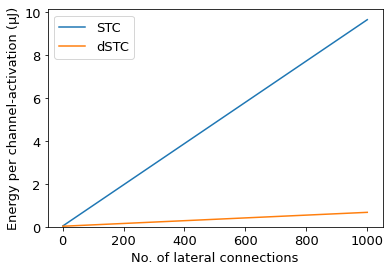

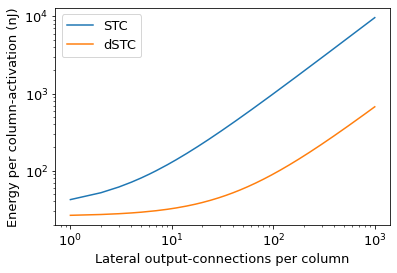

In [9]:
"""Energy plot
"""
plt.figure()

plt.plot(n_lat, e_stc * 1e6)
plt.plot(n_lat, e_sstc * 1e6)

bottom, top = plt.ylim()
plt.ylim(bottom=0)

plt.xlabel("No. of lateral connections")
plt.ylabel("Energy per channel-activation (µJ)")
plt.legend(['STC', 'dSTC'])

"""Log-scale figure
"""
plt.figure()
plt.rcParams['font.size'] = '13'

plt.plot(n_lat, e_stc * 1e9)
plt.plot(n_lat, e_sstc * 1e9)

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Lateral output-connections per column")
plt.ylabel("Energy per column-activation (nJ)")
plt.legend(['STC', 'dSTC'])

plt.savefig("Images/energy_logscale.eps")
#bbox_inches = 'tight')